**Problem Statement**:

The objective of this project is to develop a sentiment analysis model using Recurrent Neural Networks (RNNs) to predict the sentiment (positive or negative) of IMDB movie reviews. We will compare the performance of three types of RNNs: "vanilla" RNN, Long Short-Term Memory (LSTM), and Gated Recurrent Unit (GRU).

Keras, a high-level deep learning library, provides a convenient interface for loading the IMDB data and encoding the words into integers based on their frequency. This preprocessing step eliminates the need for manual data preparation, saving time and effort.

The IMDB dataset consists of 25,000 training sequences and 25,000 test sequences. The sentiment labels are binary, with an equal representation of positive and negative outcomes in both the training and test sets.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb

# Load the IMDB data
max_features = 2000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [ ]:
pip install keras

1- Use the `imdb.load_data()` to load in the data 

2- Specify the maximum length of a sequence to 30 words and the pick the 2000 most common words. 

In [ ]:
# Check the number of sequences in the train and test sets
print("x_train = %d train sequences" % x_train.shape[0])
print("x_test = %d train sequences" % x_test.shape[0])

x_train = 25000 train sequences
x_test = 25000 train sequences


3- Check that the number of sequences in train and test datasets are equal (default split):
    
Expected output:
- `x_train = 25000 train sequences`

- `x_test = 25000 test sequences`

In [ ]:
# Set the maximum sequence length to 30
max_words = 30
x_train = tf.keras.utils.pad_sequences(x_train, maxlen=max_words)
x_test = tf.keras.utils.pad_sequences(x_test, maxlen=max_words)

4- Pad (or truncate) the sequences so that they are of the maximum length

In [ ]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (25000, 30)
x_test shape: (25000, 30)


5- After padding or truncating, check the dimensionality of x_train and x_test.

Expected output:
- `x_train shape: (25000, 30)`
- `x_test shape: (25000, 30)`

In [ ]:
from keras.callbacks import TensorBoard
from sklearn.model_selection import StratifiedKFold
%load_ext tensorboard

# Define the callback and specify the log directory
tensorboard = TensorBoard(log_dir='logs_assignment3/', histogram_freq=0, write_graph=True, write_images=False)

# Split the data into 10 folds
kfold = StratifiedKFold(n_splits=10, shuffle=True)

In [ ]:
%tensorboard --logdir logs_assigmente3/

Reusing TensorBoard on port 6006 (pid 32288), started 1:14:04 ago. (Use '!kill 32288' to kill it.)

<p>6- For all your models:</p>
<p>- Use tensorboard to run your experiments</p>
<p>- Use cross valdiation with 10 folds</p>

<p>7- Build the RNN with three layers:</p>
<ul>
<li>
<p>The SimpleRNN layer with 5 neurons and initialize its kernel with stddev=0.001</p>
</li>
<li>
<p>The Embedding layer and initialize it by setting the word embedding dimension to 50. This means that this layer takes each integer in the sequence and embeds it in a 50-dimensional vector.</p>
</li>
<li>
<p>The output layer has the sigmoid activation function.</p>
</li>
</ul>

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.preprocessing import sequence
import time

# Define the model
keras.backend.clear_session()
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=50, input_length=max_words))
model.add(SimpleRNN(units=5, kernel_initializer=keras.initializers.RandomNormal(stddev=0.001),
                    activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

<p>8- How many parameters have the embedding layer?</p>

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 50)            100000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 5)                 280       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 100,286
Trainable params: 100,286
Non-trainable params: 0
_________________________________________________________________


<p>9- Train the network with the RMSprop with learning rate of .0001 and epochs=10.</p>

In [ ]:
from keras.optimizers import RMSprop
rmsprop = RMSprop(learning_rate=0.0001)

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=rmsprop, metrics=['accuracy'])

loss = []
accuracy = []
val_loss = []
val_accuracy = []
test_accuracy = []

for train, test in kfold.split(x_train, y_train):  
    # Train the model
    history = model.fit(x_train[train], y_train[train], epochs=10, batch_size=64, callbacks=[tensorboard], 
              validation_data=(x_train[test], y_train[test]), verbose = 0)
    loss.append(history.history['loss'])
    accuracy.append(history.history['accuracy'])
    val_loss.append(history.history['val_loss'])
    val_accuracy.append(history.history['val_accuracy'])
    
    # Evaluate the model
    scores = model.evaluate(x_test, y_test, verbose=0)
    test_accuracy.append(scores)
    print("Test Accuracy: %.2f%%" % (scores[1]*100))

Test Accuracy: 53.92%
Test Accuracy: 54.53%
Test Accuracy: 55.26%
Test Accuracy: 55.84%
Test Accuracy: 56.43%
Test Accuracy: 56.93%
Test Accuracy: 57.22%
Test Accuracy: 57.28%
Test Accuracy: 57.49%
Test Accuracy: 57.70%


<p>10- PLot the loss and accuracy metrics during the training and interpret the result.</p>

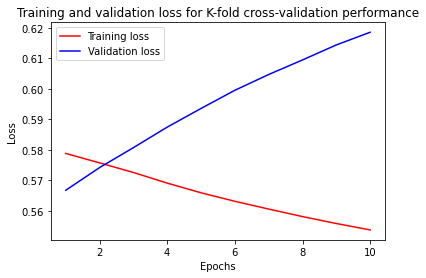

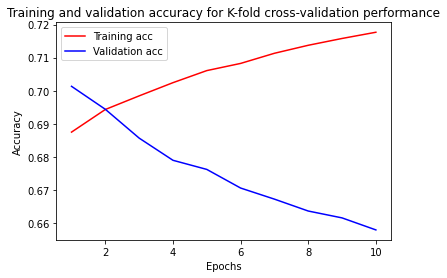

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# plot the average loss and accuracy across all folds over the training epochs
loss = np.mean(loss, axis=0)
accuracy = np.mean(accuracy, axis=0)
val_loss = np.mean(val_loss, axis=0)
val_accuracy = np.mean(val_accuracy, axis=0)

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for K-fold cross-validation performance')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, accuracy, 'r', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy for K-fold cross-validation performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
test_accuracy

[[0.7131129503250122, 0.5391600131988525],
 [0.7252579927444458, 0.5453199744224548],
 [0.7313358783721924, 0.5526400208473206],
 [0.7355021834373474, 0.5583599805831909],
 [0.737510621547699, 0.5642799735069275],
 [0.737923800945282, 0.5692800283432007],
 [0.7441205978393555, 0.5722000002861023],
 [0.7573359608650208, 0.5728399753570557],
 [0.7674537301063538, 0.5749199986457825],
 [0.7734335660934448, 0.5770000219345093]]

<p>11- Check the accuracy and the loss of your models on the test dataset.</p>

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test loss for baseline model: ", test_loss)
print("Test accuracy for baseline model: ", test_acc)

782/782 [==============================] - 2s 2ms/step - loss: 0.7734 - accuracy: 0.5770
Test loss for baseline model:  0.7734335660934448
Test accuracy for baseline model:  0.5770000219345093


## Tuning The Vanilla RNN Network


<p>12- Prepare the data to use sequences of length 80 rather than length 30 and retrain your model. Did it improve the performance?</p>
<p>13- Try different values of the maximum length of a sequence ("max_features"). Can you improve the performance?</p>
<p>14- Try smaller and larger sizes of the RNN hidden dimension. How does it affect the model performance? How does it affect the run time?</p>

Test Accuracy: 57.70%
Test Accuracy: 57.70%
Test Accuracy: 57.70%
Test Accuracy: 57.70%
Test Accuracy: 57.70%
Test Accuracy: 57.70%
Test Accuracy: 57.70%
Test Accuracy: 57.70%
Test Accuracy: 57.70%
Test Accuracy: 57.70%
558.4270069599152


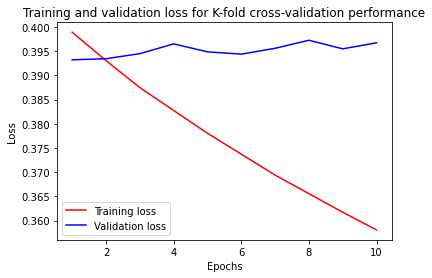

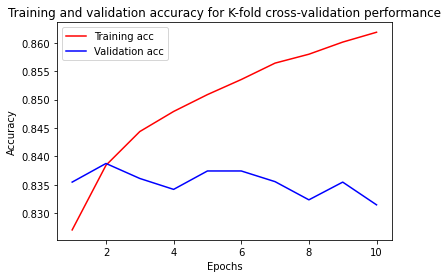

In [ ]:
maxlen = 80
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = tf.keras.utils.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.utils.pad_sequences(x_test, maxlen=maxlen)

start_time_80 = time.time()
keras.backend.clear_session()
model1 = Sequential()
model1.add(Embedding(input_dim=max_features, output_dim=50, input_length=maxlen))
model1.add(SimpleRNN(units=5, kernel_initializer=keras.initializers.RandomNormal(stddev=0.001),
                    activation='tanh'))
model1.add(Dense(1, activation='sigmoid'))

# Compile the model
model1.compile(loss='binary_crossentropy', optimizer=rmsprop, metrics=['accuracy'])

loss1 = []
accuracy1 = []
val_loss1 = []
val_accuracy1 = []
test_accuracy1 = []

for train, test in kfold.split(x_train, y_train): 
    # Train the model
    history1 = model1.fit(x_train[train], y_train[train], epochs=10, batch_size=64, callbacks=[tensorboard], 
              validation_data=(x_train[test], y_train[test]), verbose=0)
    loss1.append(history1.history['loss'])
    accuracy1.append(history1.history['accuracy'])
    val_loss1.append(history1.history['val_loss'])
    val_accuracy1.append(history1.history['val_accuracy'])
    # Evaluate the model
    scores1 = model1.evaluate(x_test, y_test, verbose=0)
    test_accuracy1.append(scores)
    print("Test Accuracy: %.2f%%" % (scores[1]*100))
    
end_time_80 = time.time()
runtime_80 = end_time_80 - start_time_80
print(runtime_80)
    
# plot the average loss and accuracy across all folds over the training epochs
loss1 = np.mean(loss1, axis=0)
accuracy1 = np.mean(accuracy1, axis=0)
val_loss1 = np.mean(val_loss1, axis=0)
val_accuracy1 = np.mean(val_accuracy1, axis=0)
epochs = range(1, len(loss1) + 1)

plt.figure()
plt.plot(epochs, loss1, 'r', label='Training loss')
plt.plot(epochs, val_loss1, 'b', label='Validation loss')
plt.title('Training and validation loss for K-fold cross-validation performance')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, accuracy1, 'r', label='Training acc')
plt.plot(epochs, val_accuracy1, 'b', label='Validation acc')
plt.title('Training and validation accuracy for K-fold cross-validation performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_accuracy1

[[0.7734335660934448, 0.5770000219345093],
 [0.7734335660934448, 0.5770000219345093],
 [0.7734335660934448, 0.5770000219345093],
 [0.7734335660934448, 0.5770000219345093],
 [0.7734335660934448, 0.5770000219345093],
 [0.7734335660934448, 0.5770000219345093],
 [0.7734335660934448, 0.5770000219345093],
 [0.7734335660934448, 0.5770000219345093],
 [0.7734335660934448, 0.5770000219345093],
 [0.7734335660934448, 0.5770000219345093]]

In [ ]:
test_loss1, test_acc1 = model1.evaluate(x_test, y_test)
print("Test loss for model 1: ", test_loss1)
print("Test accuracy for model 1: ", test_acc1)

782/782 [==============================] - 4s 5ms/step - loss: 0.4127 - accuracy: 0.8210
Test loss for model 1:  0.4126855134963989
Test accuracy for model 1:  0.8209999799728394


In [ ]:
maxlen = 130
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = tf.keras.utils.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.utils.pad_sequences(x_test, maxlen=maxlen)

start_time_130 = time.time()
keras.backend.clear_session()
model2 = Sequential()
model2.add(Embedding(input_dim=max_features, output_dim=50, input_length=maxlen))
model2.add(SimpleRNN(units=5, kernel_initializer=keras.initializers.RandomNormal(stddev=0.001),
                    activation='tanh'))
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(loss='binary_crossentropy', optimizer=rmsprop, metrics=['accuracy'])

loss2 = []
accuracy2 = []
val_loss2 = []
val_accuracy2 = []
test_accuracy2 = []

for train, test in kfold.split(x_train, y_train): 
    # Train the model
    history2 = model2.fit(x_train[train], y_train[train], epochs=10, batch_size=64, callbacks=[tensorboard], 
              validation_data=(x_train[test], y_train[test]), verbose=0)
    loss2.append(history2.history['loss'])
    accuracy2.append(history2.history['accuracy'])
    val_loss2.append(history2.history['val_loss'])
    val_accuracy2.append(history2.history['val_accuracy'])
    # Evaluate the model
    scores = model2.evaluate(x_test, y_test, verbose=0)
    test_accuracy2.append(scores)
    print("Test Accuracy: %.2f%%" % (scores[1]*100))
    
endtime_130 = time.time()
runtime_130 = end_time_130 - start_time_130
print(runtime_130)
# plot the average loss and accuracy across all folds over the training epochs
loss2 = np.mean(loss2, axis=0)
accuracy2 = np.mean(accuracy2, axis=0)
val_loss2 = np.mean(val_loss2, axis=0)
val_accuracy2 = np.mean(val_accuracy2, axis=0)
epochs = range(1, len(loss2) + 1)

plt.figure()
plt.plot(epochs, loss2, 'r', label='Training loss')
plt.plot(epochs, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss for K-fold cross-validation performance')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, accuracy2, 'r', label='Training acc')
plt.plot(epochs, val_accuracy2, 'b', label='Validation acc')
plt.title('Training and validation accuracy for K-fold cross-validation performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Test Accuracy: 79.65%
Test Accuracy: 83.34%
Test Accuracy: 83.84%
Test Accuracy: 83.88%
Test Accuracy: 84.09%
Test Accuracy: 83.95%
Test Accuracy: 84.00%
Test Accuracy: 83.94%
Test Accuracy: 84.20%
Test Accuracy: 84.40%


NameError: name 'end_time_130' is not defined

In [ ]:
test_accuracy2

In [ ]:
test_loss2, test_acc2 = model2.evaluate(x_test, y_test)
print("Test loss for model 2: ", test_loss2)
print("Test accuracy for model 2: ", test_acc2)

In [ ]:
from keras.layers import SimpleRNN, Dense
from keras.models import Sequential
import time
maxlen = 130
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = tf.keras.utils.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.utils.pad_sequences(x_test, maxlen=maxlen)

hidden_dimensions = [4, 8, 16, 32, 64, 128]
time_comparison = []

for hidden_dim in hidden_dimensions:
    keras.backend.clear_session()
    start_time = time.time()
    model3 = Sequential()
    model3.add(Embedding(input_dim=max_features, output_dim=50, input_length=maxlen))
    model3.add(SimpleRNN(units=hidden_dim, kernel_initializer=keras.initializers.RandomNormal(stddev=0.001),
                         activation='tanh'))
    model3.add(Dense(1, activation='sigmoid'))
    # Compile the model
    model3.compile(loss='binary_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
    
    kfold = StratifiedKFold(n_splits=10, shuffle=True)
    
    loss3 = []
    accuracy3 = []
    val_loss3 = []
    val_accuracy3 = []
    test_accuracy3 = []
    
    
    for train, test in kfold.split(x_train, y_train): 
        # Train the model
        history3 = model3.fit(x_train[train], y_train[train], epochs=10, batch_size=64, callbacks=[tensorboard], 
                              validation_data=(x_train[test], y_train[test]), verbose=0)
        loss3.append(history3.history['loss'])
        accuracy3.append(history3.history['accuracy'])
        val_loss3.append(history3.history['val_loss'])
        val_accuracy3.append(history3.history['val_accuracy'])
        # Evaluate the model
        scores = model3.evaluate(x_test, y_test, verbose=0)
        test_accuracy3.append(scores[1]*100)
        print("Test Accuracy: %.2f%%" % (scores[1]*100))
        
    end_time = time.time()
    runtime = end_time - start_time
    time_comparison.append(runtime)
    
    # plot the average loss and accuracy across all folds over the training epochs
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    loss3 = np.mean(loss3, axis=0)
    val_loss3 = np.mean(val_loss3, axis=0)
    accuracy3 = np.mean(accuracy3, axis=0)
    val_accuracy3 = np.mean(val_accuracy3, axis=0)
    epochs = range(1, len(loss3) + 1)

    axs[0].plot(epochs, loss3, 'r', label='Training loss')
    axs[0].plot(epochs, val_loss3, 'b', label='Validation loss')
    axs[0].set_title('Training and validation loss for K-fold cross-validation performance')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend()

    axs[1].plot(epochs, accuracy3, 'r', label='Training acc')
    axs[1].plot(epochs, val_accuracy3, 'b', label='Validation acc')
    axs[1].set_title('Training and validation accuracy for K-fold cross-validation performance')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()    

In [ ]:
time_comparison

## Train LSTM and GRU networks

<p>15- Build LSTM and GRU networks and compare their performance (accuracy and execution time) with the SimpleRNN. What is your conclusion?</p>

In [ ]:
#LSTM Model
from keras.layers import LSTM, GRU, Dense
from keras.models import Sequential

maxlen = 130
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = tf.keras.utils.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.utils.pad_sequences(x_test, maxlen=maxlen)

start_time_lstm = time.time()
keras.backend.clear_session()
model_lstm = Sequential()

model_lstm.add(Embedding(input_dim=max_features, output_dim=50, input_length=maxlen))
model_lstm.add(LSTM(units=128, kernel_initializer=keras.initializers.RandomNormal(stddev=0.001),
                    activation='tanh'))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(loss='binary_crossentropy', optimizer=rmsprop, metrics=['accuracy'])

loss_lstm = []
accuracy_lstm = []
val_loss_lstm = []
val_accuracy_lstm = []
test_accuracy_lstm = []

for train, test in kfold.split(x_train, y_train): 
    # Train the model
    history_lstm = model_lstm.fit(x_train[train], y_train[train], epochs=10, batch_size=64, callbacks=[tensorboard], 
              validation_data=(x_train[test], y_train[test]), verbose = 0)
    loss_lstm.append(history_lstm.history['loss'])
    accuracy_lstm.append(history_lstm.history['accuracy'])
    val_loss_lstm.append(history_lstm.history['val_loss'])
    val_accuracy_lstm.append(history_lstm.history['val_accuracy'])
    # Evaluate the model
    scores = model_lstm.evaluate(x_test, y_test, verbose=0)
    test_accuracy_lstm.append(scores)
    print("Accuracy: %.2f%%" % (scores[1]*100))

end_time_lstm = time.time()
runtime_lstm = end_time_lstm - start_time_lstm
print(runtime_lstm)

# plot the average loss and accuracy across all folds over the training epochs
loss_lstm = np.mean(loss_lstm, axis=0)
accuracy_lstm = np.mean(accuracy_lstm, axis=0)
val_loss_lstm = np.mean(val_loss_lstm, axis=0)
val_accuracy_lstm = np.mean(val_accuracy_lstm, axis=0)
epochs = range(1, len(loss_lstm) + 1)

plt.figure()
plt.plot(epochs, loss_lstm, 'r', label='Training loss')
plt.plot(epochs, val_loss_lstm, 'b', label='Validation loss')
plt.title('Training and validation loss for K-fold cross-validation performance')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, accuracy_lstm, 'r', label='Training acc')
plt.plot(epochs, val_accuracy_lstm, 'b', label='Validation acc')
plt.title('Training and validation accuracy for K-fold cross-validation performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#GRU Model
from keras.layers import GRU, Dense
from keras.models import Sequential

maxlen = 120
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = tf.keras.utils.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.utils.pad_sequences(x_test, maxlen=maxlen)

start_time_gru = time.time()
keras.backend.clear_session()
model_gru = Sequential()

model_gru.add(Embedding(input_dim=max_features, output_dim=50, input_length=maxlen))
model_gru.add(GRU(units=128, kernel_initializer=keras.initializers.RandomNormal(stddev=0.001),
                    activation='tanh'))
model_gru.add(Dense(1, activation='sigmoid'))

# Compile the model
model_gru.compile(loss='binary_crossentropy', optimizer=rmsprop, metrics=['accuracy'])

loss_gru = []
accuracy_gru = []
val_loss_gru = []
val_accuracy_gru = []
test_accuracy_gru = []

for train, test in kfold.split(x_train, y_train): 
    # Train the model
    history_gru = model_gru.fit(x_train[train], y_train[train], epochs=10, batch_size=64, callbacks=[tensorboard], 
              validation_data=(x_train[test], y_train[test]), verbose=0 )
    loss_gru.append(history_gru.history['loss'])
    accuracy_gru.append(history_gru.history['accuracy'])
    val_loss_gru.append(history_gru.history['val_loss'])
    val_accuracy_gru.append(history_gru.history['val_accuracy'])
    # Evaluate the model
    scores = model_gru.evaluate(x_test, y_test, verbose=0)
    test_accuracy_gru.append(scores)
    print("Accuracy: %.2f%%" % (scores[1]*100))

end_time_gru = time.time()
runtime_gru = end_time_gru - start_time_gru
print(runtime_gru)

# plot the average loss and accuracy across all folds over the training epochs
loss_gru = np.mean(loss_gru, axis=0)
accuracy_gru = np.mean(accuracy_gru, axis=0)
val_loss_gru = np.mean(val_loss_gru, axis=0)
val_accuracy_gru = np.mean(val_accuracy_gru, axis=0)
epochs = range(1, len(loss_gru) + 1)

plt.figure()
plt.plot(epochs, loss_gru, 'r', label='Training loss')
plt.plot(epochs, val_loss_gru, 'b', label='Validation loss')
plt.title('Training and validation loss for K-fold cross-validation performance')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, accuracy_gru, 'r', label='Training acc')
plt.plot(epochs, val_accuracy_gru, 'b', label='Validation acc')
plt.title('Training and validation accuracy for K-fold cross-validation performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<p>16- Save the weights of the best model to the local drive.</p>

<p><strong>Bonus</strong></p>
<p>17- Instead of word tokenization,&nbsp; tokonize the reviews based on characters and build LSTM and GRU networks, and compare their performance with respect to word based tokenization.</p>

In [ ]:
from keras.preprocessing.text import Tokenizer

maxlen = 130
max_features = 2000

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_features)

# Tokenize reviews based on characters
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts([text.lower() for text in tf.keras.datasets.imdb.get_word_index()])
x_train = tokenizer.texts_to_sequences([' '.join([tokenizer.index_word.get(i - 3, '') for i in seq]) for seq in x_train])
x_test = tokenizer.texts_to_sequences([' '.join([tokenizer.index_word.get(i - 3, '') for i in seq]) for seq in x_test])
x_train = tf.keras.utils.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.utils.pad_sequences(x_test, maxlen=maxlen)

#Let's Define the Model
start_time_t_lstm = time.time()
tf.keras.backend.clear_session()
model_t_lstm = Sequential()
model_t_lstm.add(Embedding(input_dim=max_features, output_dim=128, input_length=maxlen))
model_t_lstm.add(LSTM(units=128, kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.001)))
model_t_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_t_lstm.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

loss_t_lstm = []
accuracy_t_lstm = []
val_loss_t_lstm = []
val_accuracy_t_lstm = []
test_accuracy_t_lstm = []

for train, test in kfold.split(x_train, y_train): 
    # Train the model
    history_t_lstm = model.fit(x_train[train], y_train[train], epochs=10, batch_size=64, callbacks=[tensorboard], 
                        validation_data=(x_train[test], y_train[test]))
    loss_t_lstm.append(history.history['loss'])
    accuracy_t_lstm.append(history.history['accuracy'])
    val_loss_t_lstm.append(history.history['val_loss'])
    val_accuracy_t_lstm.append(history.history['val_accuracy'])
    # Evaluate the model
    scores = model_t_lstm.evaluate(x_test, y_test, verbose=0)
    test_accuracy_t_lstm.append(scores[1]*100)
    print("Accuracy: %.2f%%" % (scores[1]*100))

end_time_t_lstm = time.time()
runtime_t_lstm = end_time_t_lstm - start_time_t_lstm
print(runtime_t_lstm)

# plot the average loss and accuracy across all folds over the training epochs
loss_t_lstm = np.mean(loss_t_lstm, axis=0)
accuracy_t_lstm = np.mean(accuracy_t_lstm, axis=0)
val_loss_t_lstm = np.mean(val_loss_t_lstm, axis=0)
val_accuracy_t_lstm = np.mean(val_accuracy_t_lstm, axis=0)
epochs = range(1, len(loss_t_lstm) + 1)

plt.figure()
plt.plot(epochs, loss_t_lstm, 'r', label='Training loss')
plt.plot(epochs, val_loss_t_lstm, 'b', label='Validation loss')
plt.title('Training and validation loss for K-fold cross-validation performance')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, accuracy_t_lstm, 'r', label='Training acc')
plt.plot(epochs, val_accuracy_t_lstm, 'b', label='Validation acc')
plt.title('Training and validation accuracy for K-fold cross-validation performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Let's Define the Model
start_time_t_gru = time.time()
tf.keras.backend.clear_session()
model_t_gru = Sequential()
model_t_gru.add(Embedding(input_dim=max_features, output_dim=128, input_length=maxlen))
model_t_gru.add(LSTM(units=128, kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.001)))
model_t_gru.add(Dense(1, activation='sigmoid'))

# Compile the model
model_t_gru.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

loss_t_gru = []
accuracy_t_gru = []
val_loss_t_gru = []
val_accuracy_t_gru = []
test_accuracy_t_gru = []

for train, test in kfold.split(x_train, y_train): 
    # Train the model
    history_t_gru = model.fit(x_train[train], y_train[train], epochs=10, batch_size=64, callbacks=[tensorboard], 
                        validation_data=(x_train[test], y_train[test]))
    loss_t_gru.append(history.history['loss'])
    accuracy_t_gru.append(history.history['accuracy'])
    val_loss_t_gru.append(history.history['val_loss'])
    val_accuracy_t_gru.append(history.history['val_accuracy'])
    # Evaluate the model
    scores = model_t_gru.evaluate(x_test, y_test, verbose=0)
    test_accuracy_t_gru.append(scores[1]*100)
    print("Accuracy: %.2f%%" % (scores[1]*100))

end_time_t_gru = time.time()
runtime_t_gru = end_time_t_gru - start_time_t_gru
print(runtime_t_gru)

# plot the average loss and accuracy across all folds over the training epochs
loss_t_gru = np.mean(loss_t_gru, axis=0)
accuracy_t_gru = np.mean(accuracy_t_gru, axis=0)
val_loss_t_gru = np.mean(val_loss_t_gru, axis=0)
val_accuracy_t_gru = np.mean(val_accuracy_t_gru, axis=0)
epochs = range(1, len(loss_t_gru) + 1)

plt.figure()
plt.plot(epochs, loss_t_gru, 'r', label='Training loss')
plt.plot(epochs, val_loss_t_gru, 'b', label='Validation loss')
plt.title('Training and validation loss for K-fold cross-validation performance')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, accuracy_t_gru, 'r', label='Training acc')
plt.plot(epochs, val_accuracy_t_gru, 'b', label='Validation acc')
plt.title('Training and validation accuracy for K-fold cross-validation performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()